In [26]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import collections
import pandas as pd
import seaborn as sns
import matplotlib as mp
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import LogNorm

sns.set()

# Read simulation files
def datafileread(measurename,skipfirstrows):
    # Reading Datafiles
    path = measurename
    data = np.genfromtxt(path,
                        skip_header=skipfirstrows,
                        delimiter=',',
                        dtype=(float,float),
                        unpack=True)
    return data

# measurement
tlp_v,tlp_length,nominal,amplitude,width = datafileread('cz_regulator_V5.csv',14)

print("Width : %E -> %E" % (np.amin(width), np.amax(width)))

tlp_length = np.round(tlp_length * 1e9, decimals=1)
width = np.fabs(width)

# Add DC voltage value
# It's a simplification over the actual input voltage
# but we need consistent values for the x-axis otherwise the x-values cannot be matched from one simulation to another 
tlp_v += 1

df_amplitude = pd.DataFrame({'x': tlp_length, 'y': tlp_v, 'z': amplitude})
df_amplitude = df_amplitude.pivot(index='y',columns='x', values='z')

df_width = pd.DataFrame({'x': tlp_length, 'y': tlp_v, 'z': width})
df_width = df_width.pivot(index='y',columns='x', values='z')
df_width = df_width.multiply(1e9)
df_width

Width : 4.142570E-07 -> 9.496900E-06


x,100.0,117.2,137.4,161.0,188.7,221.2,259.3,303.9,356.2,417.5,...,2395.0,2807.2,3290.3,3856.6,4520.3,5298.3,6210.2,7279.0,8531.7,10000.0
y,,,,,,,,,,,,,,,,,,,,,
-2.5,1002.580,1062.230,1123.450,1187.440,1253.590,1325.430,1401.430,1482.680,1572.450,1670.630,...,2345.91,2626.11,2955.91,3350.94,3815.23,4370.48,5032.86,5828.51,6768.30,7871.12
-2.4,1035.180,1092.510,1153.590,1216.520,1282.410,1351.610,1428.420,1509.780,1600.000,1698.250,...,2332.88,2610.66,2944.06,3336.00,3804.82,4357.88,5021.31,5817.93,6764.41,7867.30
-2.3,1068.700,1124.090,1186.660,1250.810,1314.770,1388.870,1466.880,1541.000,1607.420,1683.270,...,2318.67,2598.78,2931.00,3324.00,3793.32,4345.25,5007.52,5803.80,6750.48,7869.52
-2.2,1105.810,1164.400,1227.140,1290.050,1350.350,1404.660,1455.610,1521.170,1589.350,1664.350,...,2304.13,2583.75,2915.34,3310.91,3780.16,4335.24,4993.75,5789.12,6738.26,7867.39
-2.1,1150.830,1195.620,1239.700,1284.770,1333.240,1386.870,1445.180,1503.730,1573.790,1647.080,...,2288.72,2567.87,2899.49,3294.57,3765.00,4317.79,4982.00,5776.43,6722.00,7852.50
-2.0,1134.830,1178.420,1221.870,1268.740,1316.720,1365.730,1424.260,1484.520,968.757,1010.310,...,2273.17,2549.41,2883.14,3276.84,3749.93,4306.15,4966.53,5761.27,6710.28,7836.68
-1.9,1116.330,1161.140,774.472,799.361,825.111,855.051,887.946,922.263,956.296,998.818,...,2254.22,2533.52,2863.52,3259.37,3728.88,4289.06,4950.34,5742.76,6693.75,7825.21
-1.8,716.173,742.567,765.061,789.149,818.189,845.140,878.627,912.186,947.129,988.459,...,2235.48,2512.93,2844.65,3238.93,3711.68,4265.88,4929.72,5728.94,6681.67,7809.84
-1.7,706.109,728.680,753.000,777.878,801.718,830.162,866.000,898.253,932.445,970.929,...,2215.05,2494.00,2821.34,3218.51,3687.69,4243.28,4914.33,5710.61,6663.63,7800.84


In [29]:
df_amplitude

x,100.0,117.2,137.4,161.0,188.7,221.2,259.3,303.9,356.2,417.5,...,2395.0,2807.2,3290.3,3856.6,4520.3,5298.3,6210.2,7279.0,8531.7,10000.0
y,,,,,,,,,,,,,,,,,,,,,
-2.5,2.27713,2.27713,2.27713,2.27713,2.27713,2.27713,2.27713,2.27713,2.27713,2.27713,...,2.03907,1.98954,1.93237,1.86685,1.79151,1.70679,1.61102,1.50300,1.38157,1.24770
-2.4,2.30229,2.30229,2.30229,2.30229,2.30229,2.30229,2.30229,2.30229,2.30229,2.30219,...,2.04160,1.99142,1.93415,1.86835,1.79345,1.70867,1.61263,1.50480,1.38492,1.25133
-2.3,2.32900,2.32900,2.32900,2.32900,2.32900,2.32900,2.32900,2.32408,2.31515,2.30397,...,2.04380,1.99407,1.93657,1.87025,1.79509,1.70999,1.61394,1.50573,1.38615,1.25567
-2.2,2.35519,2.35519,2.35519,2.35519,2.35220,2.34434,2.33498,2.32708,2.31747,2.30676,...,2.04671,1.99668,1.93898,1.87254,1.79761,1.71186,1.61560,1.50721,1.38760,1.25855
-2.1,2.38006,2.37447,2.36813,2.36170,2.35470,2.34671,2.33857,2.32876,2.31995,2.30943,...,2.04920,1.99948,1.94173,1.87515,1.79923,1.71330,1.61703,1.50891,1.38907,1.26010
-2.0,2.38312,2.37702,2.37085,2.36420,2.35710,2.34819,2.34169,2.33082,2.32281,2.31210,...,2.05250,2.00232,1.94445,1.87753,1.80173,1.71579,1.61939,1.51075,1.39094,1.26159
-1.9,2.38586,2.37996,2.37355,2.36655,2.35938,2.35189,2.34374,2.33509,2.32524,2.31501,...,2.05542,2.00557,1.94721,1.88073,1.80421,1.71814,1.62110,1.51247,1.39240,1.26296
-1.8,2.38864,2.38267,2.37627,2.36953,2.36258,2.35490,2.34699,2.33802,2.32862,2.31790,...,2.05906,2.00886,1.95072,1.88416,1.80764,1.72079,1.62380,1.51457,1.39423,1.26413
-1.7,2.39113,2.38501,2.37875,2.37219,2.36500,2.35713,2.34997,2.34091,2.33200,2.32051,...,2.06293,2.01262,1.95392,1.88748,1.81102,1.72402,1.62666,1.51664,1.39564,1.26547


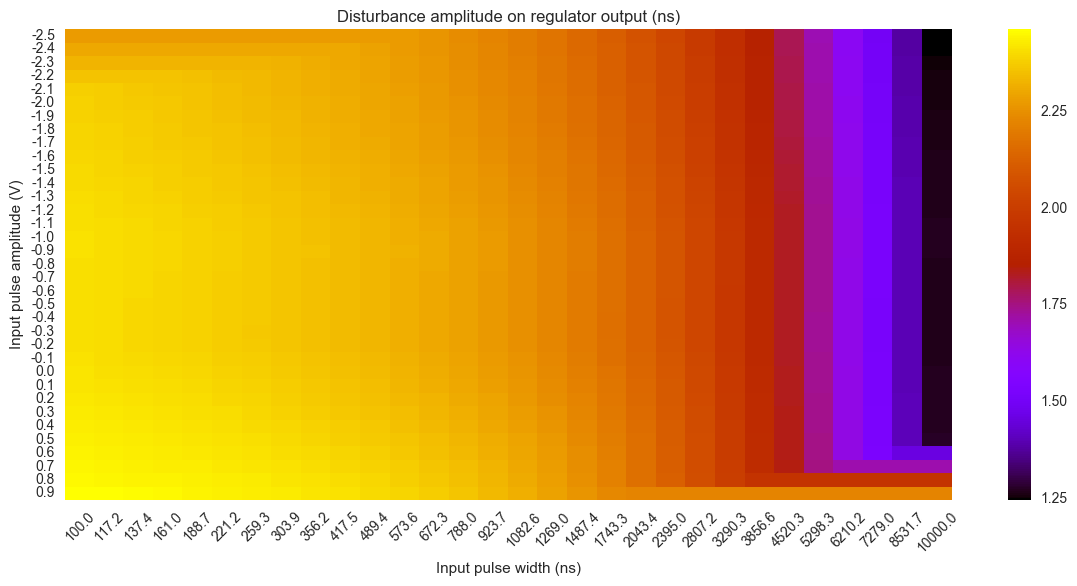

In [27]:
plt.figure(figsize=(12,6))
ax = sns.heatmap(df_amplitude, cmap='gnuplot')
ax.set_xlabel("Input pulse width (ns)")
ax.set_ylabel("Input pulse amplitude (V)")
plt.grid(True, which="both")

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(45)
    
ax.set_title("Disturbance amplitude on regulator output (ns)")
plt.plot()
plt.tight_layout()
plt.savefig("../../src/4/figures/regulator_cz_V2_amplitude.png", pad_inches=0.3)
plt.show()

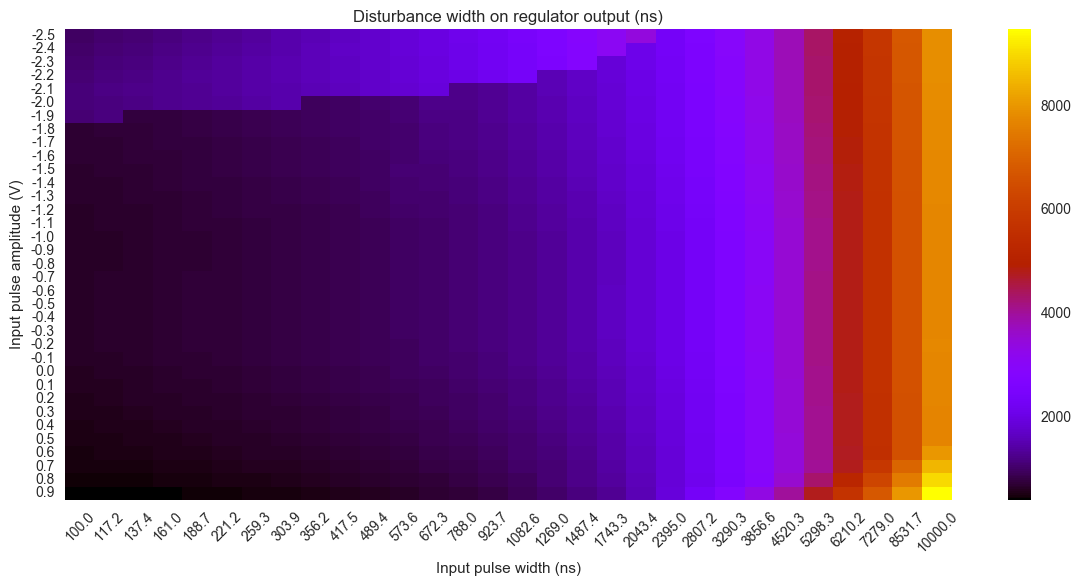

In [28]:
plt.figure(figsize=(12,6))
#ax = sns.heatmap(df_width, cmap='gnuplot', norm=LogNorm(vmin=df_width.values.min(), vmax=df_width.values.max()))
ax = sns.heatmap(df_width, cmap='gnuplot')
ax.set_xlabel("Input pulse width (ns)")
ax.set_ylabel("Input pulse amplitude (V)")
plt.grid(True, which="both")

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(45)
    
ax.set_title("Disturbance width on regulator output (ns)")
#plt.xscale('log')
plt.plot()
plt.tight_layout()
plt.savefig("../../src/4/figures/regulator_cz_v2_width.png", pad_inches=0.3)
plt.show()